# Project 3: Medical Data Visualizer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read csv file
df = pd.read_csv('medical_examination.csv')
df.info()
df.head()
df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
41315,59039,16665,2,172,76.0,130,90,1,1,0,0,1,0


#### 1. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [2]:
df['bmi'] = df['weight'] / (df['height']/100)**2
df['overweight'] = (df['bmi'] > 25).astype(int)
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
11967,17088,15101,1,160,68.0,140,90,2,1,0,0,1,1,26.562500,1
6746,9619,18081,1,163,95.0,160,90,1,1,0,0,1,1,35.755956,1
46380,66241,22003,1,164,68.0,130,90,1,1,0,0,1,1,25.282570,1
3352,4734,21241,1,156,62.0,110,80,1,1,0,0,0,0,25.476660,1
19113,27295,20534,1,155,74.0,128,85,1,1,0,0,0,0,30.801249,1


#### 2. Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [3]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
# df.cholesterol.unique()
# df.gluc.unique()

#### 3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

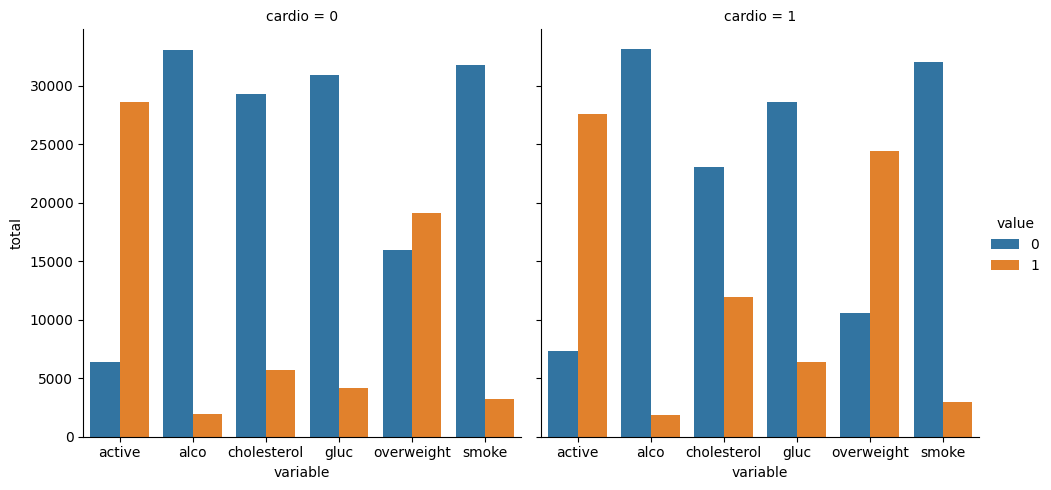

In [4]:
 # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
# df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])


# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
df_cat = pd.melt(df, var_name = 'variable', value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'], id_vars = 'cardio')

# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")
fig = fig.fig
fig.savefig('catplot.png')


#### creating heatmap.

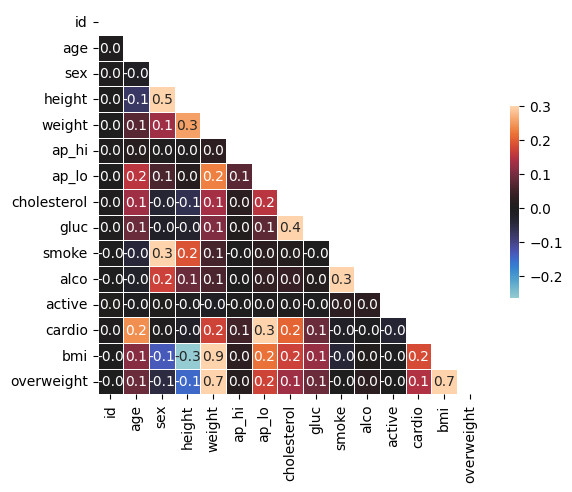

In [11]:
df_heat = df[(df['ap_lo']  <= df['ap_hi']) &
             (df['height'] >= df['height'].quantile(0.025)) & 
             (df['height'] <= df['height'].quantile(0.975)) & 
             (df['weight'] >= df['weight'].quantile(0.025)) & 
             (df['weight'] <= df['weight'].quantile(0.975)) ]

# Calculate the correlation matrix
corr = df_heat.corr() 

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(7, 5))
    
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)
  
fig.savefig('heatmap.png')


In [10]:
df.shape, df_heat.shape

((70000, 15), (63259, 15))

#### 1. 